In [70]:
# Import Pandas, Numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Save csv to variable and show first 20 rows
vg_data = pd.read_csv('vgsales.csv', sep = ',')
vg_data.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [2]:
# Get a quick description of our data
vg_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
# Show the shape of the dataframe
vg_data.shape

(16598, 11)

In [4]:
# Learn about the dataset
vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Check for empty values
vg_data.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [41]:
# Remove data with empty 'Year' column
vg_data.dropna(subset=['Year'], inplace=True)
vg_data['Year'] = vg_data['Year'].apply(int)
vg_data.shape



(16327, 12)

In [ ]:
# Create new column that displays the decade of the title's release
def make_time_periods(year):
    if year >= 1980 and year < 1990:
        return '1980-89'
    elif year >= 1990 and year < 1999:
        return '1990-99'
    elif year >= 2000 and year < 2009:
        return '2000-09'
    elif year >= 2010 and year < 2019:
        return '2010-19'
    
vg_data['Decade'] = vg_data['Year'].apply(make_time_periods)

In [42]:
# Best selling video games between all platforms
best_selling_game = vg_data.groupby('Name', as_index = False).sum()[['Name', 'Global_Sales']]
best_selling_game.sort_values('Global_Sales', ascending = False).head(10)

,Name,Global_Sales
10883,Wii Sports,82.74
3664,Grand Theft Auto V,55.92
9229,Super Mario Bros.,45.31
9611,Tetris,35.84
5508,Mario Kart Wii,35.82
10885,Wii Sports Resort,33.00
7266,Pokemon Red/Pokemon Blue,31.37
1212,Call of Duty: Modern Warfare 3,30.83
6648,New Super Mario Bros.,30.01
1208,Call of Duty: Black Ops II,29.72


<Figure size 756x522 with 0 Axes>

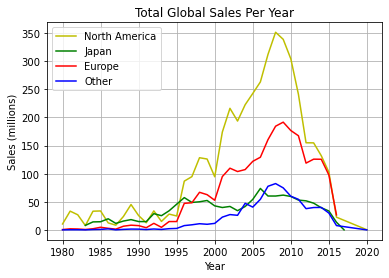

In [56]:
# Total Global Sales per Year
na_per_year = vg_data[vg_data['NA_Sales'] > 0].groupby('Year', as_index = False).sum()[['Year', 'NA_Sales']]
jp_per_year = vg_data[vg_data['JP_Sales'] > 0].groupby('Year', as_index = False).sum()[['Year', 'JP_Sales']]
eu_per_year = vg_data[vg_data['EU_Sales'] > 0].groupby('Year', as_index = False).sum()[['Year', 'EU_Sales']]
ot_per_year = vg_data[vg_data['Other_Sales'] > 0].groupby('Year', as_index = False).sum()[['Year', 'Other_Sales']]

plt.figure(figsize = (10.5, 7.25))
fig = plt.figure()

plt.plot(na_per_year['Year'], na_per_year['NA_Sales'], 'y', label = 'North America')
plt.plot(jp_per_year['Year'], jp_per_year['JP_Sales'], 'g', label = 'Japan')
plt.plot(eu_per_year['Year'], eu_per_year['EU_Sales'], 'r', label = 'Europe')
plt.plot(ot_per_year['Year'], ot_per_year['Other_Sales'], 'b', label = 'Other')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Total Global Sales Per Year')
plt.show()
fig.savefig('total_global_sales_per_year.png')

In [71]:
top_08 = vg_data[vg_data['Year'] == 2008].groupby('Name', as_index = False).sum()[['Name', 'NA_Sales']]
top_08.sort_values('NA_Sales', ascending = False).head(5)

,Name,NA_Sales
494,Mario Kart Wii,15.85
306,Grand Theft Auto IV,11.53
109,Call of Duty: World at War,9.30
872,Super Smash Bros. Brawl,6.75
313,Guitar Hero: World Tour,6.21


<Figure size 1080x1080 with 0 Axes>

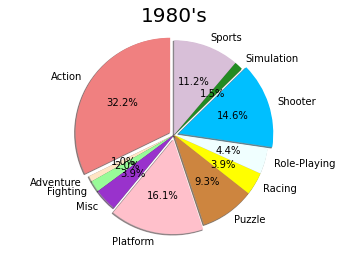

In [61]:
eighties_by_genre = vg_data[ vg_data['Decade'] == '1980-89'].groupby('Genre', as_index = False).count()

x = eighties_by_genre['Name']
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0)
colors = ['lightcoral', 'bisque', 'palegreen', 'darkorchid', 'pink', 'peru', 'yellow', 'azure', 'deepskyblue', 'forestgreen', 'thistle', 'slategrey']
autopct = '%1.1f%%'

plt.figure(figsize = [15, 15])
fig, ax = plt.subplots()
ax.pie(x,
       explode = explode,
       labels = [i for i in eighties_by_genre['Genre']],
       colors = colors,
       autopct = autopct,
       shadow = True,
       radius = 2,
       startangle = 90)
ax.axis('equal')

plt.title("1980's", fontsize = 20)

fig.savefig('games_per_genre_eighties')
plt.show()



<Figure size 864x864 with 0 Axes>

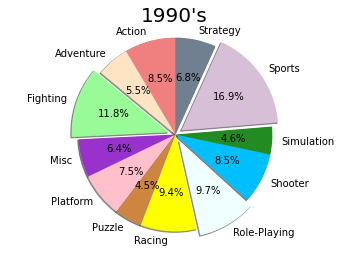

In [62]:
nineties_by_genre = vg_data[vg_data['Decade'] == '1990-99'].groupby('Genre', as_index = False).count()

x_2 = nineties_by_genre['Name']
explode = (0, 0, 0.15, 0, 0, 0, 0, 0.15, 0, 0, 0.15, 0)

plt.figure(figsize = [12, 12])
fig, ax2 = plt.subplots()
ax2.pie(x_2,
        explode = explode,
        labels = [i for i in nineties_by_genre['Genre']],
        colors = colors,
        autopct = autopct,
        shadow = True,
        radius = 2,
        startangle = 90)
ax2.axis('equal')

plt.title("1990's", fontsize = 20)

plt.savefig('games_per_genre_nineties')
plt.show()

<Figure size 7200x7200 with 0 Axes>

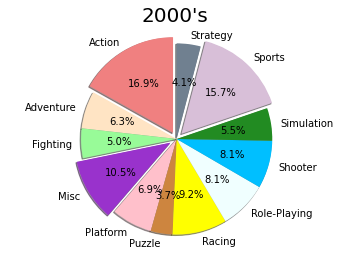

In [63]:
two_thousands_by_genre = vg_data[vg_data['Decade'] == '2000-09'].groupby('Genre', as_index = False).count()

x_3 = two_thousands_by_genre['Name']
explode = (0.15, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0.15, 0)

plt.figure(figsize = [100, 100])
fig3, ax3 = plt.subplots()
ax3.pie(x_3,
       explode = explode,
       labels = [i for i in two_thousands_by_genre['Genre']],
       colors = colors,
       autopct = autopct,
       shadow = True,
       radius = 2,
       startangle = 90)
ax3.axis('equal')

plt.title("2000's", fontsize = 20)

plt.savefig('games_per_genre_two_thousands')
plt.show()

<Figure size 7200x7200 with 0 Axes>

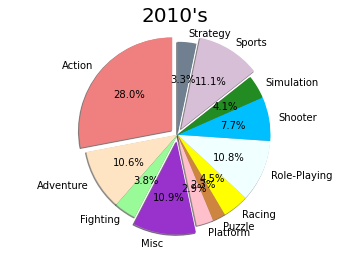

In [64]:
tens_by_genre = vg_data[vg_data['Decade'] == '2010-19'].groupby('Genre', as_index = False).count()

x_4 = tens_by_genre['Name']
explode = (0.15, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0.15, 0)

plt.figure(figsize = [100, 100])
fig4, ax4 = plt.subplots()
ax4.pie(x_4,
       explode = explode,
       labels = [i for i in tens_by_genre['Genre']],
       colors = colors,
       autopct = autopct,
       shadow = True,
       radius = 2,
       startangle = 90)
ax4.axis('equal')

plt.title("2010's", fontsize = 20)

plt.savefig('games_per_genre_tens')
plt.show()

In [69]:
sports_in_nineties = vg_data[(vg_data['Decade'] == '1990-99') & (vg_data['Genre'] == 'Sports')].groupby('Name').sum()
sports_in_nineties.sort_values('Global_Sales', ascending = False).head(5)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,
NBA Jam,2224,3986,2.94,0.41,0.00,0.08,3.44
Hot Shots Golf,528,1997,0.29,0.20,2.13,0.18,2.79
Madden NFL 99,3336,3996,2.50,0.09,0.00,0.05,2.64
NFL Blitz,3212,3996,2.43,0.09,0.00,0.05,2.56
NBA Jam Tournament Edition,10607,5984,1.96,0.35,0.00,0.07,2.37
